In [51]:
import matplotlib.pyplot as plt
import numpy as np
from skimage import io
import pandas as pd

BACKGROUND_PATH =  '../../OPT Shared files/2023-01-20 slide aperture dark/AVG_MMStack_Pos0.ome.tif'
im_stack = io.imread(BACKGROUND_PATH)


In [11]:
bg_flattened = im_stack.reshape(5,-1)

Text(0.5, 0, 'Integration time (s)')

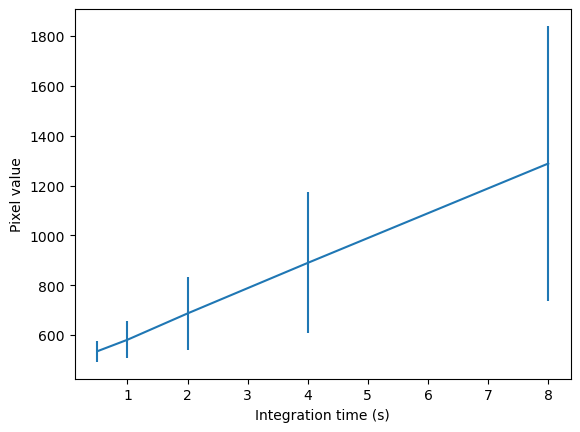

In [39]:
# plt.figure(figsize=(12,5))
integration_times = 0.5*2**np.arange(0,5)
plt.errorbar(integration_times, np.mean(bg_flattened, axis=1), yerr = np.std(bg_flattened, axis=1))
plt.ylabel('Pixel value')
plt.xlabel('Integration time (s)')

Text(0, 0.5, 'Averaged pixel value')

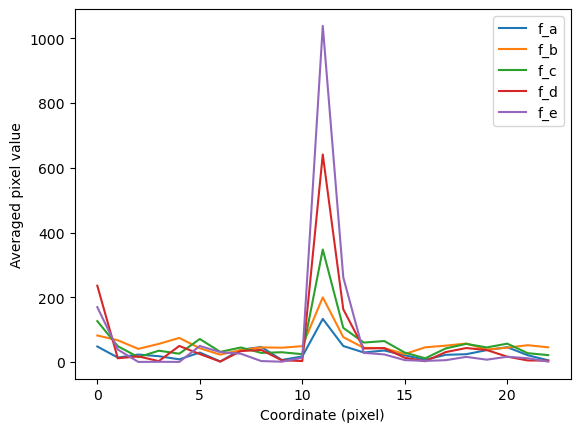

In [55]:
bead_line_profiles = pd.read_excel('../../OPT Shared files/bead-line-profiles.xlsx')
cols = bead_line_profiles.columns
for col_name in cols[1:]:
    plt.plot(bead_line_profiles[col_name], label=col_name)

plt.legend()
plt.xlabel('Coordinate (pixel)')
plt.ylabel('Averaged pixel value')

Text(0, 0.5, 'Normalised Averaged pixel value')

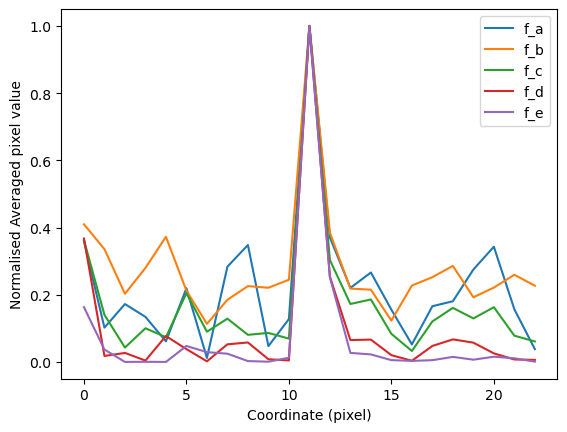

In [58]:
for col_name in cols[1:]:
    values = bead_line_profiles[col_name]
    plt.plot(values/ np.max(values), label=col_name)

plt.legend()
plt.xlabel('Coordinate (pixel)')
plt.ylabel('Normalised Averaged pixel value')

Text(0, 0.5, 'Maximum pixel value')

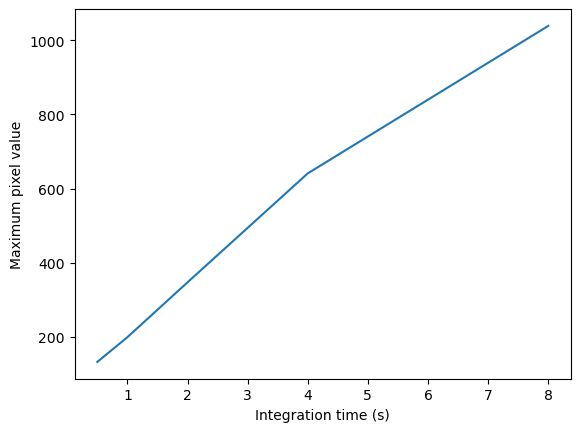

In [66]:
plt.plot(integration_times, np.max(bead_line_profiles[cols[1:]], axis=0))
plt.xlabel('Integration time (s)')
plt.ylabel('Maximum pixel value')